In [65]:
#Importing Libraries

#Importing dependencies (pandas, json, requests, numpy, matplotlib)
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [66]:
#Spotipy APU for Spotify (to pull data)
#import Client ID and Client Secret ID from config.py
from config import cid, secret

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

**Work from CSV data**

The CSV files that are pulled in here (features_df.csv, track_df.csv) are both created using the Spotipy API. For more information on creating these files with API calls, please view the pull_spotify_data.ipynb Jupyter Notebook in this repository.

In [67]:
# Import CSVs
# Tracks
csv_path = "track_df.csv"
track_df = pd.read_csv(csv_path)
track_df.head()

# Audio features
csv_path = "features_df.csv"
audio_features_df = pd.read_csv(csv_path)
audio_features_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.847,0.6220,1,-6.747,0,0.0903,0.119,0.000000,0.285,0.220,130.001,audio_features,4rXLjWdF2ZZpXCVTfWcshS,spotify:track:4rXLjWdF2ZZpXCVTfWcshS,https://api.spotify.com/v1/tracks/4rXLjWdF2ZZp...,https://api.spotify.com/v1/audio-analysis/4rXL...,125040,4
1,1,0.511,0.5320,5,-5.745,1,0.0560,0.169,0.000000,0.311,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,2,0.557,0.7740,7,-5.275,0,0.3510,0.012,0.000000,0.396,0.397,111.975,audio_features,67nepsnrcZkowTxMWigSbb,spotify:track:67nepsnrcZkowTxMWigSbb,https://api.spotify.com/v1/tracks/67nepsnrcZko...,https://api.spotify.com/v1/audio-analysis/67ne...,246134,4
3,3,0.712,0.6030,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
4,4,0.444,0.0911,0,-17.665,1,0.0307,0.959,0.000001,0.098,0.142,78.403,audio_features,6wf7Yu7cxBSPrRlWeSeK0Q,spotify:track:6wf7Yu7cxBSPrRlWeSeK0Q,https://api.spotify.com/v1/tracks/6wf7Yu7cxBSP...,https://api.spotify.com/v1/audio-analysis/6wf7...,222370,4


In [68]:
#Merge the two dataframes together
merged_df = pd.merge(track_df, audio_features_df, left_on="track_id", right_on="id", how="inner")

#remove original index columns, as well as columns containing information that isn't useful for our analysis/visualizations
merged_df = merged_df.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y", "type", "mode", "uri", "track_href", "analysis_url", "id"])
merged_df 

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Gunna,fukumean,4rXLjWdF2ZZpXCVTfWcshS,96,0.847,0.6220,1,-6.747,0.0903,0.1190,0.000000,0.285,0.220,130.001,125040,4
1,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,98,0.511,0.5320,5,-5.745,0.0560,0.1690,0.000000,0.311,0.322,137.827,219724,4
2,Travis Scott,MELTDOWN (feat. Drake),67nepsnrcZkowTxMWigSbb,94,0.557,0.7740,7,-5.275,0.3510,0.0120,0.000000,0.396,0.397,111.975,246134,4
3,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,91,0.712,0.6030,8,-5.520,0.0262,0.1860,0.000000,0.115,0.670,97.994,265493,4
4,Billie Eilish,What Was I Made For? [From The Motion Picture ...,6wf7Yu7cxBSPrRlWeSeK0Q,98,0.444,0.0911,0,-17.665,0.0307,0.9590,0.000001,0.098,0.142,78.403,222370,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,JUNNY,INVITATION (Feat. Gaeko),3ISOK4T54v6O1g1AB8FiEK,75,0.799,0.8490,4,-3.040,0.0704,0.0726,0.000000,0.116,0.913,124.032,191360,4
996,Luke Combs,Growin' Up and Gettin' Old,24Z0qiHUR9cTB4UfGUqCnj,71,0.511,0.6000,2,-5.699,0.0268,0.1600,0.000005,0.114,0.269,146.051,233667,4
997,Russ,NASTY - Extended Version,08XHGvYxioT9gMP6TPuaLR,70,0.819,0.3550,5,-7.907,0.1550,0.0274,0.000008,0.109,0.242,83.526,176766,4
998,Nessa Barrett,lie,2GQqCyDCD0Z7BL2otJkFRh,72,0.648,0.5010,2,-8.262,0.0399,0.3190,0.000081,0.127,0.656,155.040,214044,4


In [69]:
# Create a function that allows us to create a scatter plot with any two of the columns in the data frame
# It also creates a linear regression line and calculates the r value
# The function takes in the x and y values as well as making the title of the graph equal to the column names with "vs." in between

def music_plot(x_values, y_values):
    # Generate scatter plot using matplotlib (plt.scatter)
    plt.scatter(x_values, y_values, marker="o", facecolors="skyblue", edgecolors="black")

    # Generate the titles and labels for the graph, capitalize the first letter of each word
    plt.title(f"{x_values.name.capitalize()} vs. {y_values.name.capitalize()}")
    plt.xlabel(x_values.name.capitalize())
    plt.ylabel(y_values.name.capitalize())

    # Add a grid to the graph
    plt.grid()

    # Calculate the linear regression line
    x_values = x_values.astype('float')
    y_values = y_values.astype('float')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")

    # Plot and annotate the linear regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")

    # Show the figure
    plt.show()

In [70]:
# Create a new dataframe called artist_counts_df that has the following columns:
# artist_name, track_count, track_names, track_ids
# artist_name: the name of the artist
# track_count: the number of tracks by the artist in merged_df
# track_names: a list of the names of the tracks by the artist in merged_df
# track_ids: a list of the ids of the tracks by the artist in merged_df
# artist_counts_df should be sorted by track_count in descending order
# artist_counts_df should only contain artists with 2 or more tracks in merged_df

# Filter out artists with less than 2 tracks
merged_df_filtered = merged_df.groupby('artist_name').filter(lambda x: len(x) >= 2)

# Create the artist_counts_df dataframe
artist_counts_df = merged_df_filtered.groupby('artist_name').agg({
    'track_name': lambda x: list(x),  # Change 'track_id' to 'track_name'
    'track_id': lambda x: list(x)  # Change 'track_id' to 'track_ids'
})

artist_counts_df.head()

# Rename the columns
artist_counts_df = artist_counts_df.rename(columns={
    'track_name': 'track_names', 
    'track_id': 'track_ids'  # Change 'id_<lambda>' to 'track_id_<lambda>'
})

for index, artist in artist_counts_df.iterrows():
    artist_counts_df.loc[index, 'track_count'] = int(len(artist['track_names']))

# Change column order in artist_counts_df
artist_counts_df = artist_counts_df[['track_count', 'track_names', 'track_ids']]

# Sort artist_counts_df by track_count in descending order
artist_counts_df = artist_counts_df.sort_values(by='track_count', ascending=False)


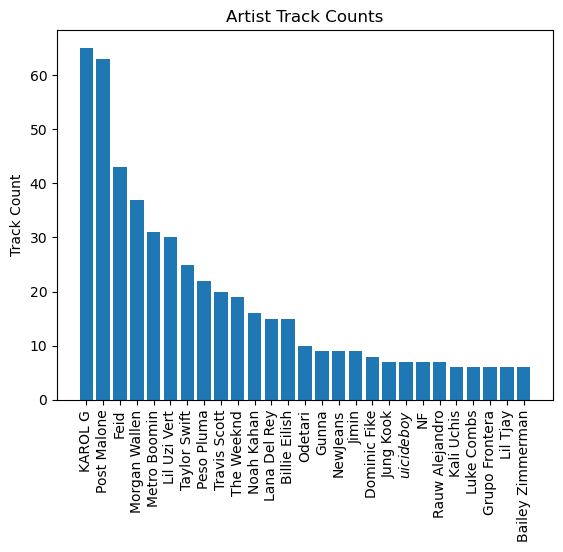

In [71]:
# Create a bar chart of the data in the artist_counts_df dataframe, plotting all artists where artist_counts_df['track_count'] is greater than 5.
# Create the bar chart using the matplotlib.pyplot.bar() function.
# Use the artist_counts_df['artist_name'] column for the x-axis labels.
# Use the artist_counts_df['track_count'] column for the y-axis values.
# Use the artist_counts_df['artist_name'] column for the tick labels.
# Use the plt.xticks() function to rotate the tick labels 90 degrees.
# Use the plt.ylabel() function to add the y-axis label.
# Use the plt.title() function to add the chart title.
# Use the plt.show() function to display the chart.

filtered_df = artist_counts_df[artist_counts_df['track_count'] > 5]

# Create the bar chart using the filtered dataframe
plt.bar(filtered_df.index, filtered_df['track_count'])

# Set the x-axis tick labels to the artist names and rotate them 90 degrees
plt.xticks(filtered_df.index, rotation=90)

# Add the y-axis label
plt.ylabel('Track Count')

# Add the chart title
plt.title('Artist Track Counts')

# Display the chart
plt.show()


In [72]:
# Create a summary statistics dataframe that includes the summary statistics for all the numerical columns in the merged_df dataframe
summary_df = merged_df.describe()

# Use the Pandas transpose function to flip the axis
summary_df = summary_df.transpose()

# Use the Pandas to_csv function to save the summary statistics dataframe to a csv file
summary_df.to_csv('summary_statistics.csv')

# Check dataframe info
summary_df.head()

,count,mean,std,min,25%,50%,75%,max
popularity,1000.0,67.428000,27.019342,0.000000,70.00000,76.0000,82.00000,100.000
danceability,1000.0,0.658810,0.150145,0.143000,0.55200,0.6725,0.77700,0.971
energy,1000.0,0.651236,0.171638,0.000116,0.55100,0.6690,0.78225,0.991
key,1000.0,5.145000,3.603743,0.000000,2.00000,5.0000,8.00000,11.000
loudness,1000.0,-6.210125,2.685936,-37.894000,-7.47425,-5.6885,-4.48875,1.002


In [73]:
# For each artist in the artist_counts_df, get the track_IDs for artists where artist_counts_df['track_count'] > 1
# Start by filtering the artist_counts_df to only include artists with more than one track
multi_track_artist_counts_df = artist_counts_df[artist_counts_df['track_count'] > 1]

multi_track_artist_track_IDs = []

# Create a list of track_IDs for each artist in multi_track_artist_counts_df['tracks']
for i in multi_track_artist_counts_df['track_names']:
    # Add the list from each row to the multi track list so that we end up with a list of strings without other lists
    multi_track_artist_track_IDs = multi_track_artist_track_IDs + i

multi_track_artist_counts_df.head()

,track_count,track_names,track_ids
artist_name,,,
KAROL G,65.0,"[TQG, AMARGURA, S91, WATATI (feat. Aldo Ranks)...","[0DWdj2oZMBFSzRsi2Cvfzf, 505v13epFXodT9fVAJ6h8..."
Post Malone,63.0,"[Chemical, Enough Is Enough, Overdrive, Someth...","[5w40ZYhbBMAlHYNDaVJIUu, 3BHFResGQiUvbYToUdaDQ..."
Feid,43.0,"[Classy 101, Niña Bonita, VENTE CONMIGO, Class...","[6XSqqQIy7Lm7SnwxS4NrGx, 3Gs7mVfWKl567mjozgxmX..."
Morgan Wallen,37.0,"[Last Night, Last Night, Thinkin’ Bout Me, You...","[59uQI0PADDKeE6UZDTJEe8, 7K3BhSpAxZBznislvUMVt..."
Metro Boomin,31.0,[Calling (Spider-Man: Across the Spider-Verse)...,"[5rurggqwwudn9clMdcchxT, 39MK3d3fonIP8Mz9oHCTB..."


***Alec Q1: How long are the songs in this dataset, and what type of distribution describes their duration?***

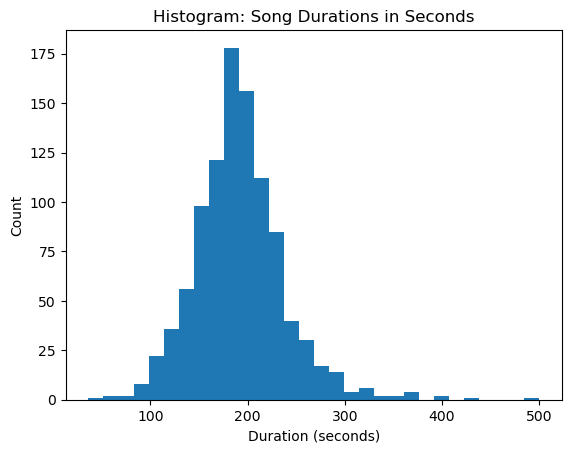

In [74]:
# Create a histogram of song durations, pulling the tracks from the merged_df dataframe and using the duration_ms column

# Convert duration_ms to seconds
merged_df['duration_sec'] = merged_df['duration_ms'] / 1000

# Create a histogram of song durations
plt.hist(merged_df['duration_sec'], bins=30)

# Add labels and title
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Histogram: Song Durations in Seconds')

# Show the plot
plt.show()


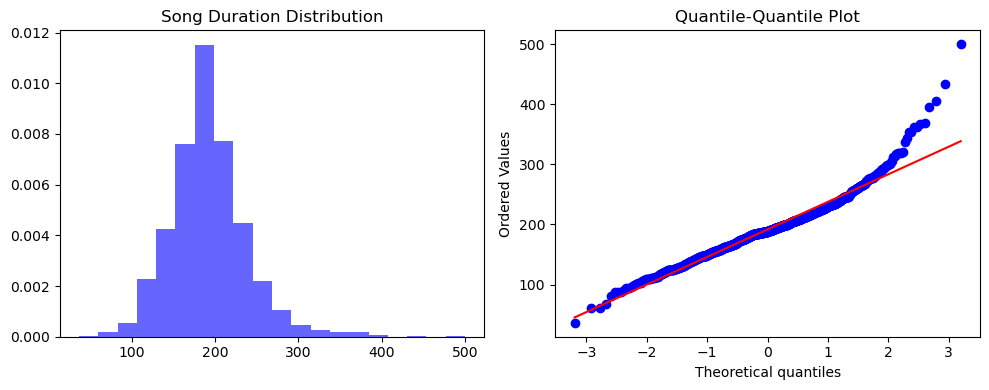

In [75]:
# Assuming 'df' is your DataFrame and 'column_name' is the column you want to analyze
data = merged_df['duration_sec']  # Replace 'column_name' with your actual column name

# Create a new figure with a specific size (width: 10, height: 4 inches)
plt.figure(figsize=(10, 4))

# Create a subplot grid with 1 row and 2 columns, select the first subplot
plt.subplot(1, 2, 1)

# Create a histogram of the data with 20 bins, normalize the data to form a probability density, 
# set transparency (alpha) for the bars, and color them blue
plt.hist(data, bins=20, density=True, alpha=0.6, color='b')

# Set the title of the first subplot
plt.title('Song Duration Distribution')

# Create a subplot grid with 1 row and 2 columns, select the second subplot
plt.subplot(1, 2, 2)

# Create a probability plot (Q-Q plot) of the data against a normal distribution,
# and use the provided subplot (plt) for plotting
st.probplot(data, dist='norm', plot=plt)

# Set the title of the second subplot
plt.title('Quantile-Quantile Plot')

# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()

# Display the entire figure with both subplots
plt.show()

Total outliers: 32
Outliers below IQR: 5
Outliers above IQR: 27


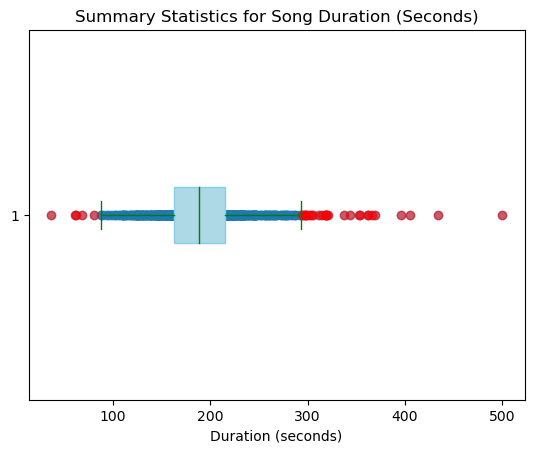

count    1000.000000
mean      191.876534
std        46.962457
min        36.227000
25%       163.012750
50%       188.514500
75%       215.199000
max       500.117000
Name: duration_sec, dtype: float64


In [76]:
# Calculate summary statistics for the duration_sec column
duration_sec_summary = merged_df['duration_sec'].describe()

# Create a box plot with the information in duration_sec_summary
# Use the matplotlib.plt library to create the plot
fig, ax = plt.subplots()
ax.boxplot(merged_df['duration_sec'], vert=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='skyblue'), whiskerprops=dict(color='g'), capprops=dict(color='g'), medianprops=dict(color='g'))

# Add axis labels and a title
ax.set_xlabel('Duration (seconds)')
ax.set_title('Summary Statistics for Song Duration (Seconds)')

# Plot each individual value in merged_df['duration_sec'] and highlight the outliers
outliers_below = merged_df['duration_sec'][merged_df['duration_sec'] < duration_sec_summary['25%'] - 1.5 * (duration_sec_summary['75%'] - duration_sec_summary['25%'])]
outliers_above = merged_df['duration_sec'][merged_df['duration_sec'] > duration_sec_summary['75%'] + 1.5 * (duration_sec_summary['75%'] - duration_sec_summary['25%'])]
plt.scatter(merged_df['duration_sec'], [1] * len(merged_df['duration_sec']), alpha=0.5)
plt.scatter(outliers_below, [1] * len(outliers_below), color='r', alpha=0.5)
plt.scatter(outliers_above, [1] * len(outliers_above), color='r', alpha=0.5)

# Now, calculate and print the amount of outliers, total and below/above the IQR
print('Total outliers: ' + str(len(outliers_below) + len(outliers_above)))
print('Outliers below IQR: ' + str(len(outliers_below)))
print('Outliers above IQR: ' + str(len(outliers_above)))

# Create two dataframes of the outliers that includes: song name, artist name, duration_sec
# One of the dataframes for the outliers below the IQR and one for the outliers above the IQR
outliers_above_df = merged_df[merged_df['duration_sec'] > duration_sec_summary['75%'] + 1.5 * (duration_sec_summary['75%'] - duration_sec_summary['25%'])]
outliers_below_df = merged_df[merged_df['duration_sec'] < duration_sec_summary['25%'] - 1.5 * (duration_sec_summary['75%'] - duration_sec_summary['25%'])]

# Show the plot
plt.show()

# Print the summary statistics
print(duration_sec_summary)


The above details the summary statistics and plots them in a box plot and histogram, then checks to see if it is a normal distribution mathematically with SciPy.Stats using Quantile to Quantile plotting on the histogram data to see that the distribution of duration of top songs is a normal distribution because when the theoretical quantiles are graphed against the ordered values we see a linear relationship.

***Alec Question #2: Do the lengths of songs correlate with their energy, valence, and danceability?***

The r-value is: -0.1541026461239214


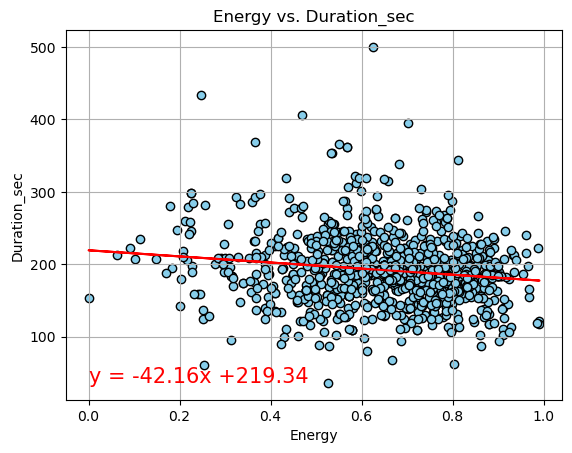

The r-value is: -0.2606948627407468


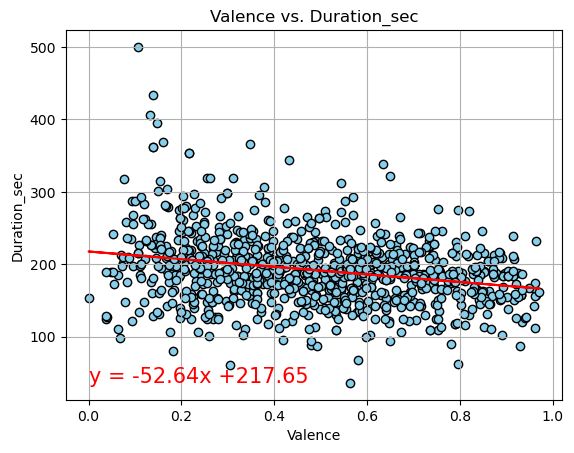

The r-value is: -0.21757927900290974


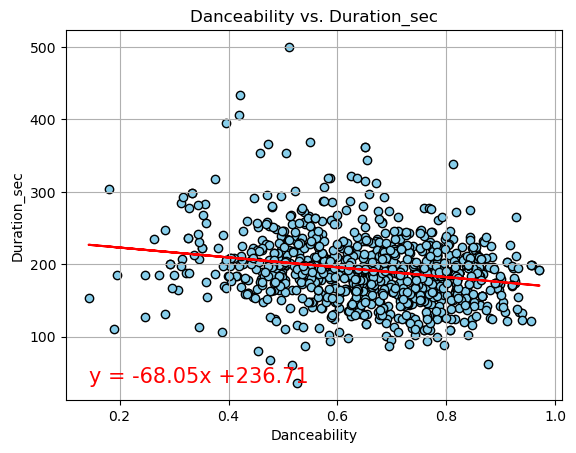

In [77]:
#Create plots of energy, valence, danceability vs. duration_sec:
music_plot(merged_df["energy"],merged_df["duration_sec"])
music_plot(merged_df["valence"],merged_df["duration_sec"])
music_plot(merged_df["danceability"],merged_df["duration_sec"])

In [78]:
#Compute correlation coefficients to quantify the relationships between song length and the other metrics

# Calculate Pearson correlation coefficients
corr_energy = merged_df['duration_sec'].corr(merged_df['energy'])
corr_valence = merged_df['duration_sec'].corr(merged_df['valence'])
corr_danceability = merged_df['duration_sec'].corr(merged_df['danceability'])

print(f"Correlation between Song Length and Energy: {corr_energy}")
print(f"Correlation between Song Length and Valence: {corr_valence}")
print(f"Correlation between Song Length and Danceability: {corr_danceability}")


Correlation between Song Length and Energy: -0.15410264612392144
Correlation between Song Length and Valence: -0.2606948627407468
Correlation between Song Length and Danceability: -0.21757927900290977


Correlation between Song Length and Energy: -0.1541
This correlation coefficient of approximately -0.1541 indicates a weak negative correlation between song length and energy. In other words, as song length increases, the energy tends to decrease slightly. The negative sign suggests that longer songs tend to have slightly lower energy levels.

Correlation between Song Length and Valence: -0.2607
This correlation coefficient of approximately -0.2607 indicates a slightly stronger negative correlation between song length and valence. As song length increases, the valence (positivity) of the songs tends to decrease to some extent. The negative sign suggests that longer songs might be associated with slightly less positive valence.

Correlation between Song Length and Danceability: -0.2176
This correlation coefficient of approximately -0.2176 indicates a moderate negative correlation between song length and danceability. As song length increases, the danceability tends to decrease moderately. The negative sign suggests that longer songs are associated with reduced danceability.

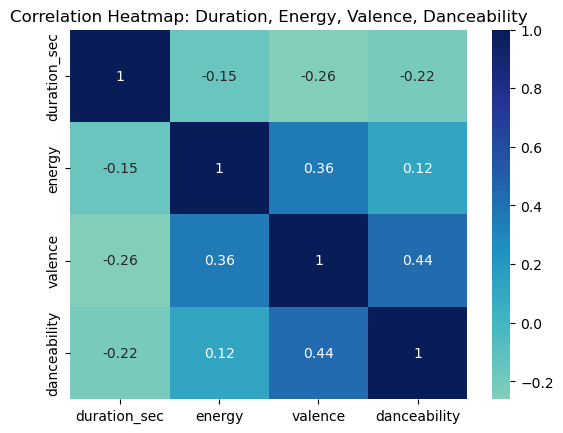

In [79]:
# Create a correlation matrix
correlation_matrix = merged_df[['duration_sec', 'energy', 'valence', 'danceability']].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', center=0)
plt.title('Correlation Heatmap: Duration, Energy, Valence, Danceability')
plt.show()


***Cindy Q1: How does the energy of a track relate to its danceability for the top 10 genres?***

In [80]:
#Fetch Genre Information for Each Artist:

genre_list = []

for artist_name in merged_df['artist_name']:
    artist_name_str = str(artist_name)  
    artist_info = sp.search(q='artist:' + artist_name_str, type='artist')
    if artist_info['artists']['items']:
        genres = artist_info['artists']['items'][0]['genres']
        genre_list.append(genres)
    else:
        genre_list.append([])  

genre_df = merged_df.copy()
# Add the list of genres to a new DataFrame
genre_df['genres'] = genre_list
genre_df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_sec,genres
0,Gunna,fukumean,4rXLjWdF2ZZpXCVTfWcshS,96,0.847,0.6220,1,-6.747,0.0903,0.119,0.000000,0.285,0.220,130.001,125040,4,125.040,"[atl hip hop, melodic rap, rap, trap]"
1,Olivia Rodrigo,vampire,3k79jB4aGmMDUQzEwa46Rz,98,0.511,0.5320,5,-5.745,0.0560,0.169,0.000000,0.311,0.322,137.827,219724,4,219.724,[pop]
2,Travis Scott,MELTDOWN (feat. Drake),67nepsnrcZkowTxMWigSbb,94,0.557,0.7740,7,-5.275,0.3510,0.012,0.000000,0.396,0.397,111.975,246134,4,246.134,"[hip hop, rap, slap house]"
3,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,91,0.712,0.6030,8,-5.520,0.0262,0.186,0.000000,0.115,0.670,97.994,265493,4,265.493,"[contemporary country, country]"
4,Billie Eilish,What Was I Made For? [From The Motion Picture ...,6wf7Yu7cxBSPrRlWeSeK0Q,98,0.444,0.0911,0,-17.665,0.0307,0.959,0.000001,0.098,0.142,78.403,222370,4,222.370,"[art pop, electropop, pop]"


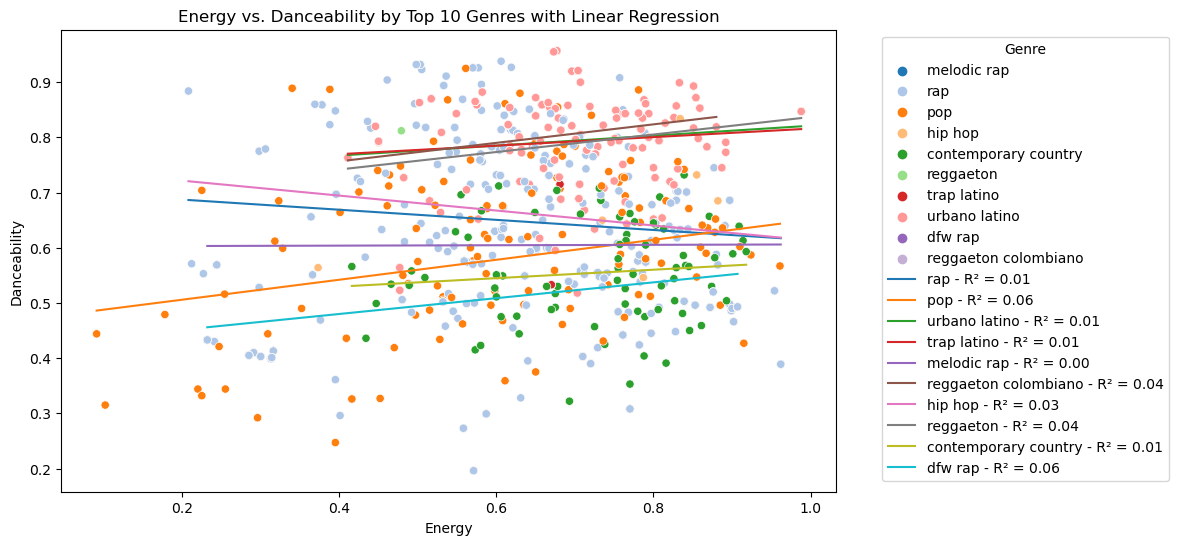

In [81]:
#HOW DOES THE ENERGY OF A TRACK RELATE TO ITS DANCEABILITY FOR THE TOP 10 GENRES?

from scipy.stats import linregress

# Calculate the frequency of each genre
genre_counts = genre_df['genres'].explode().value_counts()

# Sort the genres by frequency in descending order
top_10_genres = genre_counts.head(10).index

# Create a new DataFrame with one row per genre for each track
genre_expanded_df = genre_df.explode('genres')

# Filter the new DataFrame to include only the top 10 genres
filtered_genre_expanded_df = genre_expanded_df[genre_expanded_df['genres'].isin(top_10_genres)]

# Create a scatter plot with color mapping using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_genre_expanded_df, x='energy', y='danceability', hue='genres', palette='tab20')

# Calculate linear regression parameters for each genre separately
for genre in top_10_genres:
    genre_data = filtered_genre_expanded_df[filtered_genre_expanded_df['genres'] == genre]
    slope, intercept, r_value, p_value, std_err = linregress(genre_data['energy'], genre_data['danceability'])
    x_range = np.linspace(min(genre_data['energy']), max(genre_data['energy']), 100)
    y_range = slope * x_range + intercept
    plt.plot(x_range, y_range, label=f'{genre} - R² = {r_value**2:.2f}')

plt.title("Energy vs. Danceability by Top 10 Genres with Linear Regression")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

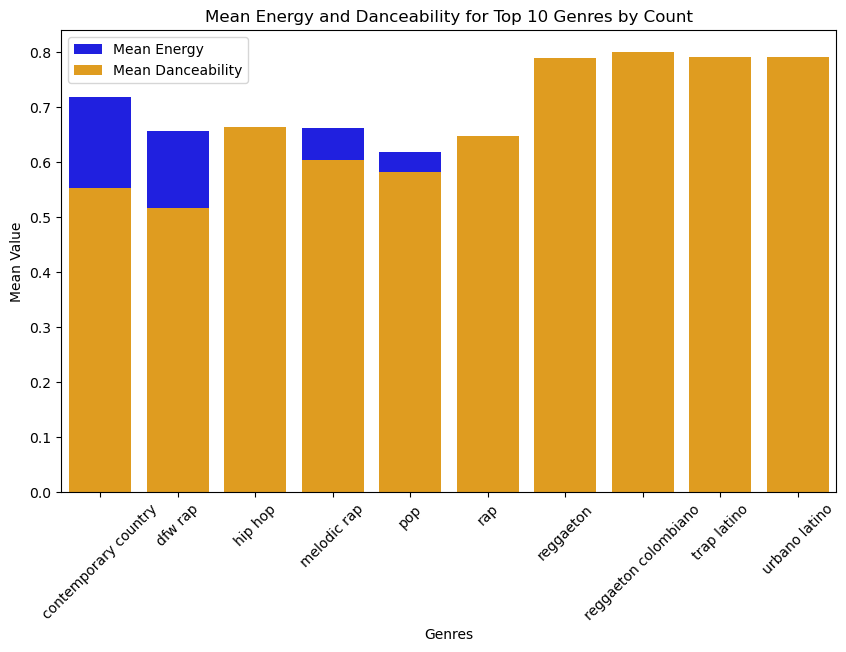

In [82]:
# Calculate the frequency of each genre
genre_counts = genre_df['genres'].explode().value_counts()

# Sort the genres by frequency in descending order
top_10_genres = genre_counts.head(10).index

# Create a new DataFrame with one row per genre for each track
genre_expanded_df = genre_df.explode('genres')

# Calculate the mean energy and danceability for each genre
genre_mean_energy_dance = genre_expanded_df.groupby('genres')[['energy', 'danceability']].mean()

# Filter the genre_mean_energy_dance DataFrame to include only the top 10 genres
top_10_genre_mean_energy_dance = genre_mean_energy_dance[genre_mean_energy_dance.index.isin(top_10_genres)]

# Reset index to make 'genres' a column again
top_10_genre_mean_energy_dance.reset_index(inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_genre_mean_energy_dance, x='genres', y='energy', color='blue', label='Mean Energy')
sns.barplot(data=top_10_genre_mean_energy_dance, x='genres', y='danceability', color='orange', label='Mean Danceability')
plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Mean Value')
plt.title('Mean Energy and Danceability for Top 10 Genres by Count')
plt.legend()
plt.show()


In summary with both the scatter and the bar plot we can see that there is not a strong linear relationship between anergy levels and danceability acroos tracks (as shown by the scatter plor low r's values), genres play a significant in determining the average and danceability values (as shown by the bar plot). This suggest that genres have unique features that affect how energy and danceability are distribuites with them.

***Cindy Q2: Is there any connection between these audio features (speachiness and loudness) of a track and its popularity?***


The r-value is: -0.09188389498676829


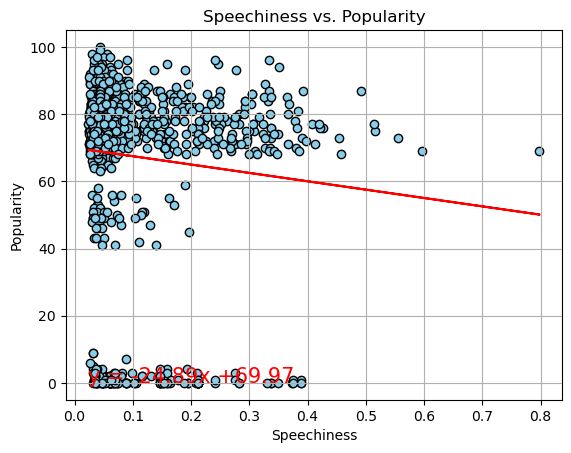

In [83]:
#Is there any connection between the speechiness and loudness of a track and its popularity?
music_plot(merged_df['speechiness'], merged_df['popularity'])


The r-value is: -0.03283245283615243


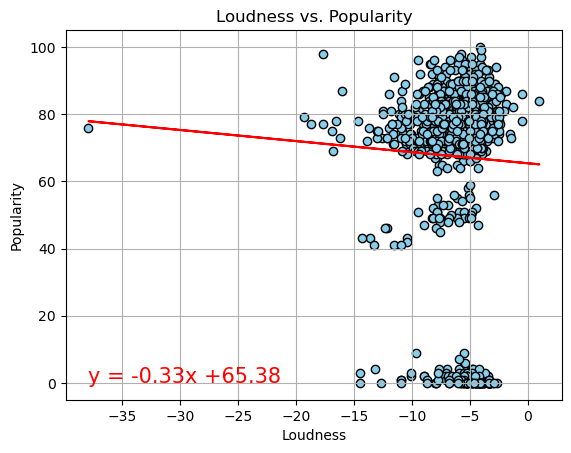

In [84]:
#Is there any connection between the speachiness and loudness of a track and its popularity?
music_plot(merged_df['loudness'], merged_df['popularity'])

For the Q2 in both cases that we analyzed speachiness vs popularity and loudness vs popularity we got rs = -0.09188389498676829 and rl = -0.03283245283615243 base on the results there seem to be a very weak negative correlation but this relatioship is not enought to draw any significant any significant conclusions. Other factor migh have a more significant influence on a tracks popularity.

***Chelsea Q1: What are the top 10 popular artists at the moment and is there a relationship on their popularity and the kind of genre of music they produce?***

In [85]:
genre_df=merged_df[['artist_name', 'popularity']].copy()
genre_df['genres']=genre_list

sorted_genre_df= genre_df.sort_values(by='popularity', ascending= False)
sorted_genre_df= pd.DataFrame(sorted_genre_df.head(10))
sorted_genre_df

,artist_name,popularity,genres
7,Jung Kook,100,[k-pop]
42,Myke Towers,99,"[reggaeton, trap latino, urbano latino]"
4,Billie Eilish,98,"[art pop, electropop, pop]"
1,Olivia Rodrigo,98,[pop]
48,Quevedo,97,"[rap canario, trap latino, urbano latino]"
8,Dua Lipa,97,"[dance pop, pop, uk pop]"
17,Bad Bunny,97,"[reggaeton, trap latino, urbano latino]"
0,Gunna,96,"[atl hip hop, melodic rap, rap, trap]"
29,David Kushner,96,"[gen z singer-songwriter, singer-songwriter pop]"
76,Dave,96,[uk hip hop]


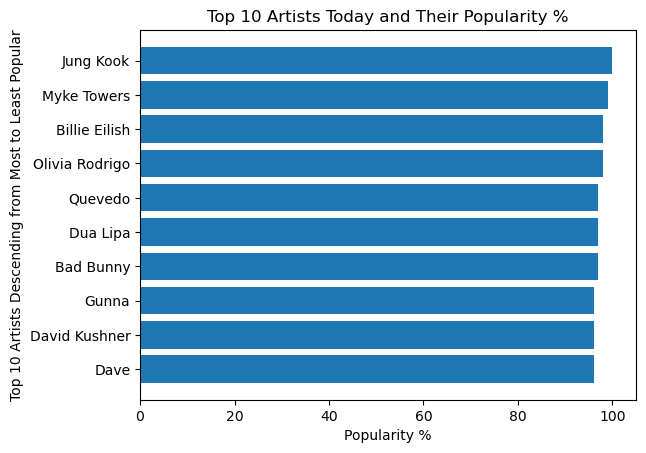

In [86]:
reversed_genre_df= sorted_genre_df.loc[::-1]
plt.barh(reversed_genre_df['artist_name'], reversed_genre_df['popularity'])
plt.xlabel('Popularity %')
plt.ylabel('Top 10 Artists Descending from Most to Least Popular')
plt.title('Top 10 Artists Today and Their Popularity %')
plt.tight_layout
plt.show()

In [87]:
from collections import Counter

all_genres = [genres for genres_list in sorted_genre_df['genres'] for genres in genres_list]
genre_counts = Counter(all_genres)

genre_count_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['genre_count'])
genre_count_df.index.name = 'genres'

genre_count_df = genre_count_df.sort_values(by='genre_count', ascending=True)




print(genre_count_df)

                         genre_count
genres                              
k-pop                              1
gen z singer-songwriter            1
trap                               1
rap                                1
melodic rap                        1
atl hip hop                        1
uk pop                             1
singer-songwriter pop              1
dance pop                          1
electropop                         1
art pop                            1
rap canario                        1
uk hip hop                         1
reggaeton                          2
pop                                3
urbano latino                      3
trap latino                        3


In [88]:
exploded_genre_df= sorted_genre_df.explode('genres')
exploded_genre_df

,artist_name,popularity,genres
7,Jung Kook,100,k-pop
42,Myke Towers,99,reggaeton
42,Myke Towers,99,trap latino
42,Myke Towers,99,urbano latino
4,Billie Eilish,98,art pop
4,Billie Eilish,98,electropop
4,Billie Eilish,98,pop
1,Olivia Rodrigo,98,pop
48,Quevedo,97,rap canario
48,Quevedo,97,trap latino


In [89]:
genre_popularity_df= exploded_genre_df.groupby('genres')['popularity'].agg(['mean','count']).reset_index()
genre_popularity_df.columns=['genres','average popularity','genre_count']
genre_popularity_df.sort_values(by='average popularity')

,genres,average popularity,genre_count
8,rap,96.000000,1
1,atl hip hop,96.000000,1
14,uk hip hop,96.000000,1
4,gen z singer-songwriter,96.000000,1
6,melodic rap,96.000000,1
12,trap,96.000000,1
11,singer-songwriter pop,96.000000,1
2,dance pop,97.000000,1
15,uk pop,97.000000,1
9,rap canario,97.000000,1


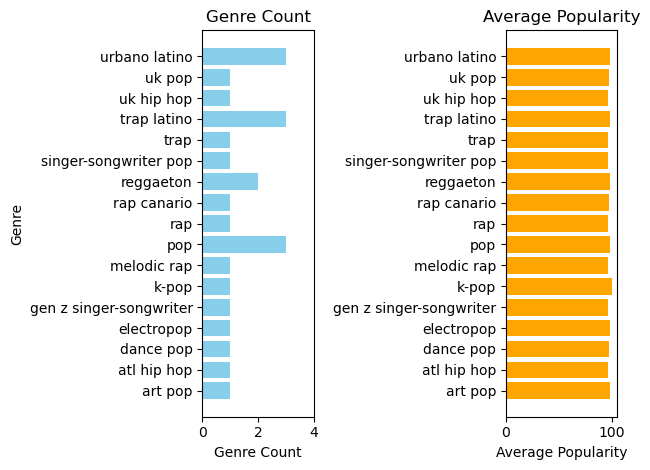

In [90]:
fig, axs= plt.subplots(1,2)
axs[0].barh(genre_popularity_df['genres'], genre_popularity_df['genre_count'], color='skyblue')
axs[0].set_xlabel('Genre Count')
axs[0].set_ylabel('Genre')
axs[0].set_title('Genre Count')
axs[0].set_xlim(0,4)

axs[1].barh(genre_popularity_df['genres'], genre_popularity_df['average popularity'], color='orange')
axs[1].set_xlabel('Average Popularity')
axs[1].set_title('Average Popularity')


plt.tight_layout()
plt.show()

#k-pop reached 100% popularity at the moment with only 1 count of the k-pop genre compared to the rest of the genres. 
#Top 3 genres are k-pop, pop, and reggaeton/latin trap.

***Chelsea Q2: How do the energy levels of the 5 top songs compare to bottom 5 songs? Do energy levels contribute to the popularity of the songs?***

In [91]:
#creating energy dataframe
energy_df= merged_df[['artist_name','track_name','energy','popularity']]
energy_df=pd.DataFrame(energy_df)
#using df to sort them into top 5 high energy df and low 5 energy df
top_5_energy= energy_df.nlargest(5,'energy')
top_5_energy=pd.DataFrame(top_5_energy)
low_5_energy= energy_df.nsmallest(5, 'energy')
low_5_energy=pd.DataFrame(low_5_energy)
low_5_energy= low_5_energy.sort_values(by='energy', ascending=False)
#Combining them into one dataframe in order to create a scatter plot
combined_energy =pd.concat([top_5_energy, low_5_energy], ignore_index=True)
sorted_combined_energy= combined_energy.sort_values(by='energy',ascending=True)
sorted_combined_energy

,artist_name,track_name,energy,popularity
9,Macroix,Promised,0.000116,76
8,Mitski,Bug Like an Angel,0.061500,75
7,Billie Eilish,What Was I Made For? [From The Motion Picture ...,0.091100,98
6,Lana Del Rey,"Paris, Texas (feat. SYML)",0.102000,77
5,Laufey,Promise,0.112000,78
4,jnhygs,SHAKE THAT SHIT!,0.969000,76
3,TRASHXRL,Sequência da Dz7,0.985000,84
2,El Alfa,PLEBADA,0.988000,86
1,6YNTHMANE,BRAZILIAN DANÇA PHONK,0.990000,85
0,Lumi Athena,LET ME SEE YA MOVE!,0.991000,78


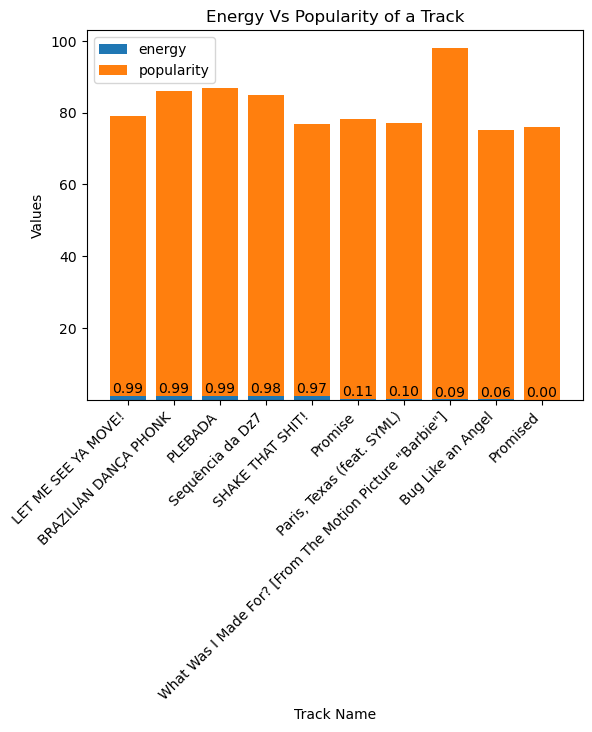

In [92]:
track_name= combined_energy['track_name']
energy= combined_energy['energy']
popularity= combined_energy['popularity']

plt.bar(range(len(energy)), energy, label= 'energy')
plt.bar(range(len(popularity)), popularity, bottom=energy, label= 'popularity')

for i, val in enumerate(energy):
    plt.text(i, val + 0.02, f'{val:.2f}', ha='center', va='bottom')

plt.xticks(range(len(track_name)), track_name, rotation= 45, ha='right')
plt.xlabel('Track Name')
plt.ylabel('Values')
plt.title('Energy Vs Popularity of a Track')

plt.legend()

The r-value is: 0.13450391477380894


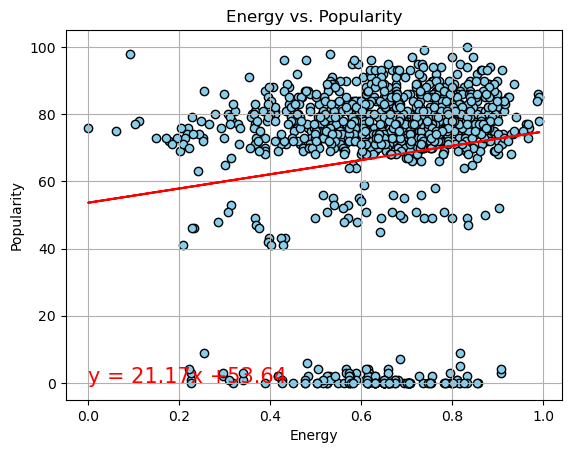

In [93]:
music_plot(merged_df['energy'], merged_df['popularity'])
#weak positive linear correlation. as energy increased, popularity also increases